# Maximum Likelihood Estimation(MLE)    


### Setting     
Sample $n$ observations (data), denoted by $X_1,X_2,...,X_n$. The data are independently drawn from some probability distribution $P$. The shorthand for this is:    

$$
X_1,...,X_n \sim_{i.i.d.}P
$$

where $i.i.d.$ stands for independent and identically distributed. In practice, we never have access
to P, we are just able to observe samples from P (namely $X_1,...,X_n$), which we will use to learn
something about P. 

Then the probability of observing $X_1,...,X_n$ is:
\begin{align*}
P_{\theta}(observing\ X_1,...,X_n) &= P_{\theta}(X_1)\times ...\times P_{\theta}(X_n) \\
&=\prod_{i=1}^{n}P_{\theta}(X_i) \\
&=L(\theta)
\end{align*}

$L(\theta)$ is the likelihood and the goal is to choose the parameter $\theta$ that gives the highest possible likelihood, i.e. find the maximum likelihood estimator
\begin{align*}
\hat{\theta}_{MLE}=arg\ maxL(\theta)
\end{align*}

### MLE on Normal distribution     
Assume $ X_1,...,X_n \sim_{i.i.d.}N(\mu,\sigma^2)$. Compute $\hat{\mu}_{MLE}$ , $\hat{\sigma}^2_{MLE}$ using MLE.

Instead of dealing with the product of all possibilities, it is equivalent to solve the problem with log-likelihood. 

For convenience, let $m=\hat{\mu}_{MLE}$ , $s=\hat{\sigma}_{MLE}$ 

The log-likelihood here is
\begin{align*}
\log L(m,s^2) &= \log(\prod^n_{i=1}\frac{1}{\sqrt{2\pi s^2}}exp(-\frac{X_i-m^2}{2s^2})) \\
&= -\frac{n}{2}\log(2\pi) -\frac{n}{2}\log(s^2) - \frac{1}{2s^2}\sum_{i=1}^{n}(X_i-m)^2
\end{align*}
Then to find $m$:
\begin{align*}
\frac{\partial}{\partial m}\log L(m,s^2)=\frac{1}{s^2}\sum_{i=1}^{n}(X_i-m)=0 \Longrightarrow m = \overline{X}
\end{align*}
To find s:
\begin{align*}
\frac{\partial}{\partial s^2}\log L(m, s^2)&=-\frac{n}{2s^2}-\frac{1}{2s^4}\sum_{i=1}^{n}(X_i-m)^2 = 0 \\
s^2 &= \frac{1}{n}\sum_{i=1}^{n}(X_i-m)^2
\end{align*}
Therefore
\begin{align*}
(\hat{\mu}_{MLE},\hat{\sigma}^2_{MLE})=(\overline{X}, \frac{1}{n}\sum_{i=1}^{n}(X_i-\overline{X})^2)
\end{align*}


To estimate how good the parameters $(\hat{\mu}_{MLE},\hat{\sigma}^2_{MLE})$ are, find their biases and variances.    

Hint:
$$
var(\frac{1}{\sigma^2}\sum_{i=1}^{n}(X_i-\overline{X}))=2(n-1)
$$

For $\hat{\mu}_{MLE}$:
\begin{align*}
bias(\hat{\mu}_{MLE})&=E[\hat{\mu}_{MLE}]-\mu=E[\overline{X}]-\mu = 0 \\
var(\hat{\mu}_{MLE}) &= var(\overline{X})=var(\frac{\sum_{i=1}^{n}X_i}{n})=\frac{1}{n^2}\sum_{i=1}^{n}var(X_i)=\frac{\sigma^2}{n}
\end{align*}
For $\hat{\sigma}^2_{MLE}$:
\begin{align*}
bias(\hat{\sigma}_{MLE}^2)
=E[\hat{\sigma}_{MLE}^2] -\sigma^2
=E[\frac{1}{n}\sum_{i=1}^{n}(X_i-\overline{X})^2]-\sigma^2
=\frac{1}{n}E[\sum_{i=1}^{n}(X_i-\overline{X})^2]-\sigma^2
\end{align*}
where
\begin{align*}
E[\sum_{i=1}^{n}(X_i-\overline{X})^2] &=E[\sum_{i=1}^{n}((X_i-\mu)-(\overline{X}-\mu))^2]\\
&=E[\sum_{i=1}^{n}((X_i-\mu)^2-2(X_i-\mu)(\overline{X}-\mu) + (\overline{X}-\mu)^2)] \\
&=E[\sum_{i=1}^{n}(X_i-\mu)^2-2(\overline{X}-\mu)(\sum_{i=1}^{n}X_i-\sum_{i=1}^{n}\mu) + \sum_{i=1}^{n}(\overline{X}-\mu)^2] \\
&=E[\sum_{i=1}^{n}(X_i-\mu)^2-2(\overline{X}-\mu)(n\overline{X}-n\mu) + n(\overline{X}-\mu)^2] \\
&=E[\sum_{i=1}^{n}(X_i-\mu)^2-2n(\overline{X}-\mu)^2 + n(\overline{X}-\mu)^2] \\
&=E[\sum_{i=1}^{n}(X_i-\mu)^2-n(\overline{X}-\mu)^2] \\
&=E[\sum_{i=1}^{n}(X_i-\mu)^2]-E[n(\overline{X}-\mu)^2] \\
&=\sigma^2-n\frac{\sigma^2}{n}=(n-1)\sigma^2
\end{align*}
(reference: [Introduction to statistical estimation](https://youtu.be/de78EahrA-c))

Then
\begin{align*}
bias(\hat{\sigma}_{MLE}^2)=\frac{1}{n}E[\sum_{i=1}^{n}(X_i-\overline{X})^2]-\sigma^2=\frac{(n-1)\sigma^2}{n}-\sigma^2=-\frac{\sigma^2}{n}
\end{align*}

$var(\hat{\sigma}_{MLE}^2)$:    
\begin{align*}
var(\hat{\sigma}_{MLE}^2)
=var(\frac{1}{n}\sum_{i=1}^{n}(X_i-\overline{X})^2)
=\frac{1}{n^2}var(\sum_{i=1}^{n}(X_i-\overline{X})^2)
\end{align*}

from the given hint we have:
$$
var(\sum_{i=1}^{n}(X_i-\overline{X})^2)=2\sigma^4(n-1)
$$
Therefore,
$$
var(\hat{\sigma}_{MLE}^2) = \frac{2\sigma^4(n-1)}{n^2}
$$


### Compare biased and unbiased estimators
Some may say the following estimator for $\sigma^2$ is better:
$$
\tilde{\sigma}^2 = \frac{1}{n-1}\sum_{i=1}^{n}(X_i-\overline{X})^2
$$
Evaluate the new estimator:
\begin{align*}
bias(\tilde{\sigma}^2) &= E[\tilde{\sigma}^2] - \sigma^2 \\
&=\frac{1}{n-1}E[\sum_{i=1}^{n}(X_i-\overline{X})^2] - \sigma^2 \\
&=\frac{1}{n-1}(n-1)\sigma^2 - \sigma^2=0 \\
\end{align*}
Well, it turns out that $\tilde{\sigma}^2$ is an unbiased estimator.

\begin{align*}
var(\tilde{\sigma}^2) &=\frac{1}{(n-1)^2} var(\sum_{i=1}^{n}(X_i-\overline{X})^2) \\
&=\frac{2\sigma^4(n-1)}{(n-1)^2} \\
&=\frac{2\sigma^4}{(n-1)}
\end{align*}

According to the results from Bias-variance decomposition on MSE, we can compare $\hat{\sigma}_{MLE}^2$ and $\tilde{\sigma}^2$

\begin{align*}
&MSE_{\hat{\sigma}_{MLE}^2} =  (-\frac{\sigma^2}{n})^2+\frac{2\sigma^4(n-1)}{n^2}=\frac{\sigma^4(2n-1)}{n^2}\\
&MSE_{\tilde{\sigma}^2} = \frac{2\sigma^4}{(n-1)}+0^2 = \frac{2\sigma^4}{(n-1)}\\
\end{align*}
Compare their MSE:
\begin{align*}
\frac{\sigma^4(2n-1)}{n^2}-\frac{2\sigma^4}{(n-1)} &\equiv \frac{(2n-1)}{n^2}-\frac{2}{(n-1)} \\
\frac{(2n-1)}{n^2}-\frac{2}{(n-1)} &= \frac{(2n-1)(n-1)-2n^2}{n^2(n-1)} \\
&= -\frac{3n-1}{n^2(n-1)} \lt 0
\end{align*}

So, although an estimator can be unbiased, but it doesn't mean such estimator has better performance.

Assume $\sigma = 1$, visualize these two estimators $\hat{\sigma}_{MLE}^2$ and $\tilde{\sigma}^2$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 1

def bias_MLE(n): return -sigma ** 2 / n
def var_MLE(n): return 2 * sigma ** 4 * (n - 1) / n ** 2
def bias_tilde(n): return 0*n
def var_tilde(n): return 2 * sigma ** 4 / (n - 1)

#### Compare bias

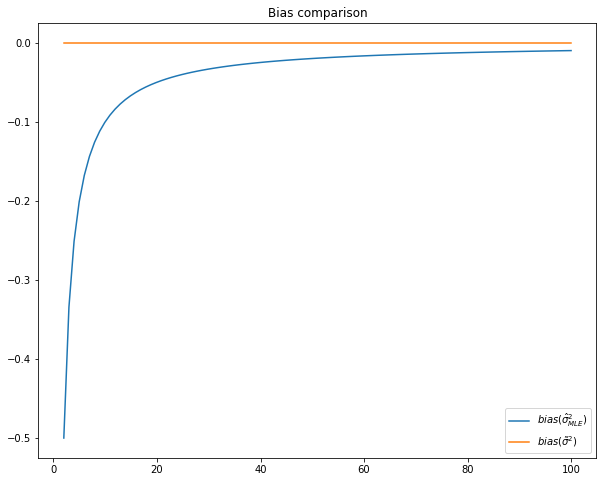

In [4]:
plt.figure(figsize=(10, 8))
x = np.linspace(2, 100, 100)
plt.plot(x, bias_MLE(x), label='$bias(\hat{\sigma}_{MLE}^2)$')
plt.plot(x, bias_tilde(x), label=r'$bias(\tilde{\sigma}^2)$')

plt.title('Bias comparison')
plt.legend()
plt.show()

#### Compare variance

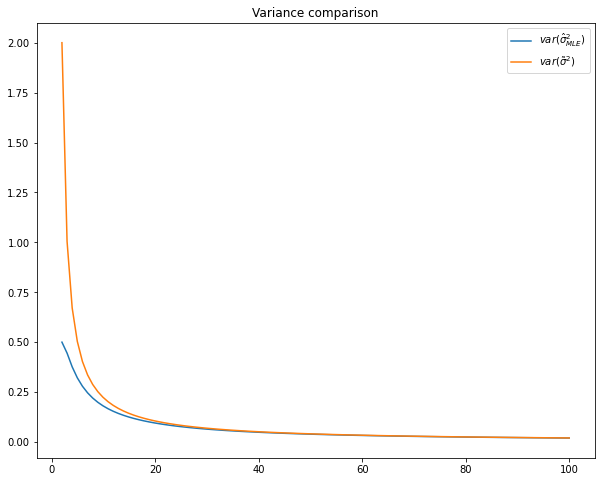

In [5]:
plt.figure(figsize=(10, 8))
plt.plot(x, var_MLE(x), label='$var(\hat{\sigma}_{MLE}^2)$')
plt.plot(x, var_tilde(x), label=r'$var(\tilde{\sigma}^2)$')

plt.title('Variance comparison')
plt.legend()
plt.show()

#### Compare MSE

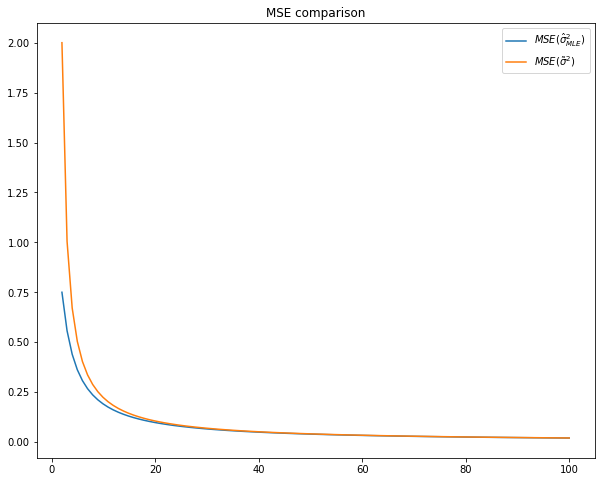

In [6]:
def mse_MLE(n):
    return sigma ** 4 * (2 * n - 1) / n ** 2


def mse_tilde(n):
    return 2 * sigma ** 4 / (n - 1)

plt.figure(figsize=(10, 8))
plt.plot(x, mse_MLE(x), label='$MSE(\hat{\sigma}_{MLE}^2)$')
plt.plot(x, mse_tilde(x), label=r'$MSE(\tilde{\sigma}^2)$')

plt.title('MSE comparison')
plt.legend()
plt.show()